## Brain Tumor Prediction and Treatment Analysis

### Introduction 
The National Brain Tumor Society reports that about 1 million Americans are living with a brain tumor with an estimated 90,000 more to receive a primary brain tumor diagnosis in the following year. There are more than 100 distinct types of primary brain tumors, each with its own spectrum of presentations, treatments, and outcomes. More than any other cancer, brain tumors can have lasting and life-altering physical, cognitive, and psychological impacts on a patient’s life.

Our study addresses three research questions that aim to understand characteristics of brain tumor diagnosis and treatment to help reveal (if any) patterns of brain tumor presentation, to support diagnosis and treatment. Our analysis aims to understand the frequency and distribution of brain tumors within the studied population. 

1. Does tumor size differ significantly between benign and malignant tumors?
2. What is the relationship between treatment modalities (radiation, surgery, chemotherapy) and patient survival rates?
3. Does the first symptom presented predict the stage of the tumor at its discovery?

The dataset utilized in this analysis was retrieved from Kaggle https://www.kaggle.com/datasets/miadul/brain-tumor-dataset. The data consists of simulated medical repositories comprising of 20,000 synthetic patient records. While the data is simulated, its breadth reflects a variety of medical scenarios, incorporating diverse patient demographics, tumor attributes, and clinical outcomes.

### Importing Packages 

In [1]:
import numpy as np 
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import geopandas as gpd
import statistics
import datetime
import seaborn as sns
%matplotlib inline

### Data wrangling - Refining, Grouping, and Shaping for Analysis
To prepare the data for analysis, the following steps were performed: 
- Rounded numbers in "Tumor_Size" column, for ease of mathematical manipulation   
- Create a smaller dataframe "brain_tumor_dataset_3" containing variables of interest 
- Convert MRI results to 0 and 1 (Negative and Positive) 
- Convert "Stage" to integer values (1, 2, 3, 4) 
- Convert "Gender" to 1 and 2 (Male and Female)
- Convert the three treatment columns (Radiation_Treatment, Surgery_Performed, and Chemotherapy) to 0 and 1 (No/Yes)

The relevant columns used in the analysis include: 
1. Gender: Gender of the patient (Male/Female).
2. Tumor_Type: Type of tumor (Benign/Malignant).
3. Tumor_Size: Size of the tumor in centimeters.
4. Stage: The stage of the tumor (I, II, III, IV).
5. Symptom_1: The first symptom observed (e.g., Headache, Seizures).
6. Symptom_2: The second symptom observed.
7. Symptom_3: The third symptom observed.
8. Radiation_Treatment: Whether radiation treatment was administered (Yes/No).
9. Surgery_Performed: Whether surgery was performed (Yes/No).
10. Chemotherapy: Whether chemotherapy was administered (Yes/No).
11. Survival_Rate: The estimated survival rate of the patient (percentage).
12. MRI_Result: The result of the MRI scan (Positive/Negative).

### 1. Tumor Size Differentiation - Visualizing the data

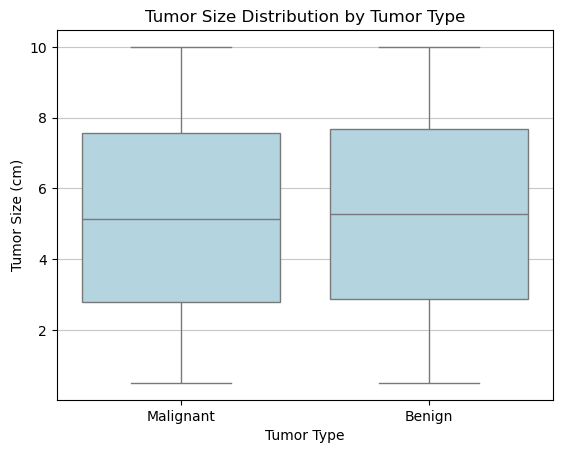

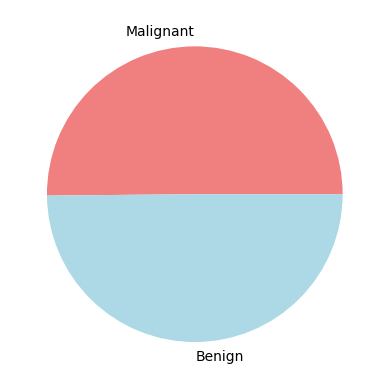

In [2]:
# Select relevant columns for question 1
brain_tumor_dataset = pd.read_csv("brain_tumor_dataset.csv")
brain_tumor_dataset_1 = brain_tumor_dataset.copy()
brain_tumor_dataset_2 = brain_tumor_dataset_1[["Tumor_Size", "Tumor_Type", "Symptom_1", "Stage", "Radiation_Treatment", "Surgery_Performed", "Chemotherapy", "Survival_Rate", "Gender", "MRI_Result"]].copy()
brain_tumor_dataset_3 = brain_tumor_dataset_2[["Tumor_Size", "Tumor_Type"]].copy()
brain_tumor_dataset_3.loc[:, "Tumor_Size"] = brain_tumor_dataset_3["Tumor_Size"].round(2)

# Plot box plot
sns.boxplot(x = "Tumor_Type", y = "Tumor_Size", data = brain_tumor_dataset_3, color = "lightblue")

# Add relevant details to plot
plt.title("Tumor Size Distribution by Tumor Type")
plt.xlabel("Tumor Type")
plt.ylabel("Tumor Size (cm)")
plt.grid(axis = "y", linestyle = "-", alpha = 0.7)

# Show boxplot
plt.show();

# Create a pie chart
malignant_count = brain_tumor_dataset_3[brain_tumor_dataset_3["Tumor_Type"] == "Malignant"].shape[0]
benign_count = brain_tumor_dataset_3[brain_tumor_dataset_3["Tumor_Type"] == "Benign"].shape[0]
tumor_type_counts = [malignant_count, benign_count]
tumor_type_counts
tumor_type_name = ["Malignant", "Benign"]
plt.pie(tumor_type_counts, labels = tumor_type_name, colors = ["lightcoral", "lightblue"]);

### Outliers 
In the boxplot analysis, we can see that there are no indications of outliers that fall outside of our data. Additionally, the similarity between the mean and median values from our statistical calulcations also suggests that our dataset does not contain significant outliers. A lack of outliers indicates that the dataset is fairly stable and representative of normal variations in tumor sizes for both benign and malignant categories. Thus, there is no need to remove/modify our existing datapoints in any way. 

In our pie chart, we can see that there are 10,030 malignant tumors and 9,970 benign tumors, indicating a somewhat even distribution. An even distribution between the two types without significant skewing supports the data's robustness and lack of outliers that could potentially skew the distribution. This robustness is crucial for our analysis for this question. 

### 1. Tumor Size Differentiation - Analysis



#### Descriptive Statistics 



In [3]:
# Malignant 
malignant_tumor_sizes = brain_tumor_dataset_3[brain_tumor_dataset_3["Tumor_Type"] == "Malignant"]["Tumor_Size"]
tumor_sizem_Q1 = np.percentile(malignant_tumor_sizes, 25)
tumor_sizem_Q3 = np.percentile(malignant_tumor_sizes, 75)

# Benign
benign_tumor_sizes = brain_tumor_dataset_3[brain_tumor_dataset_3["Tumor_Type"] == "Benign"]["Tumor_Size"]
tumor_sizeb_Q1 = np.percentile(benign_tumor_sizes, 25)
tumor_sizeb_Q3 = np.percentile(benign_tumor_sizes, 75)

print("Mean B =", np.mean(benign_tumor_sizes), "Median B =", np.median(benign_tumor_sizes))
print("Q1 B =", tumor_sizeb_Q1, "Q3 M =", tumor_sizeb_Q3)

print("Mean M =", np.mean(malignant_tumor_sizes), "Median M =", np.median(malignant_tumor_sizes))
print("Q1 M =", tumor_sizeb_Q1, "Q3 M =", tumor_sizeb_Q3)

Mean B = 5.276205616850552 Median B = 5.27
Q1 B = 2.88 Q3 M = 7.68
Mean M = 5.197162512462613 Median M = 5.14
Q1 M = 2.88 Q3 M = 7.68


## Analyses: subtitle about the analyses/models you are using 

Include other analyses here, including extracting insights using pandas and also potentially including hypothesis tests and machine learning methods in the final version of your project once we have disucssed these methods in class. 


### Outliers 
In the boxplot analysis, we can see that there are no indications of outliers that fall outside of our data. Additionally, the similarity between the mean and median values from our statistical calulcations also suggests that our dataset does not contain significant outliers. A lack of outliers indicates that the dataset is fairly stable and representative of normal variations in tumor sizes for both benign and malignant categories. Thus, there is no need to remove/modify our existing datapoints in any way. 

In our pie chart, we can see that there are 10,030 malignant tumors and 9,970 benign tumors, indicating a somewhat even distribution. An even distribution between the two types without significant skewing supports the data's robustness and lack of outliers that could potentially skew the distribution. This robustness is crucial for our analysis for this question. 

In [4]:
# Show the analyses you did here

# Breaking this up to multiple cells with multiple descriptions of what you did is a good idea



## Conclusions
- Question 1: Malignant brain tumors are cancerous and tend to grow quickly and aggressively, potentially spreading to other parts of the brain, while benign brain tumors are non-cancerous and typically grow slowly and don't spread. In our analysis between "Tumor_Type" and "Tumor_Size", we found that the percent difference between the mean tumor sizes of benign and malignant tumors is approximately 1.51%. This indicates a very slight difference in the average size of tumors between the two types. The percent difference between the median tumor sizes is approximately 2.50%, also suggesting a minor difference in the central tendency of tumor sizes for the two groups. This suggests to us that tumor type alone is not representative of the size of the tumor in the brain, despite this difference in how they manifest in the brain.  

- Question 2:
- Question 3: 

## Reflection
  

Write a few paragraphs describing what went well with this project and what was more difficult. Also describe any additional analyses you tried that you did not end up including in this report, and approximately how much time you spend working the project. 

Finally, please go to Canvas and answer a few questions related to how the project went.

As three neuroscience majors, we were excited to have the chance to analyze this dataset related to brain tumors as they are an interest we all have in common... proved to be the most difficult. We spent approximately XX hours on our project.

## Appendix 


In [6]:
# Loading dataset 
brain_tumor_dataset = pd.read_csv("brain_tumor_dataset.csv")
brain_tumor_dataset.head()

# Creating new dataset with relevant variables 
brain_tumor_dataset_1 = brain_tumor_dataset.copy()
brain_tumor_dataset_2 = brain_tumor_dataset_1[["Tumor_Size", "Tumor_Type", "Symptom_1", "Stage", "Radiation_Treatment", "Surgery_Performed", "Chemotherapy", "Survival_Rate", "Gender", "MRI_Result"]].copy()
brain_tumor_dataset_2.head()
brain_tumor_dataset_2.loc[:, "Tumor_Size"] = brain_tumor_dataset_2["Tumor_Size"].round(2)

#Display(brain_tumor_dataset_3.reset_index())
brain_tumor_dataset_2.loc[:, "Stage"] = brain_tumor_dataset_2["Stage"].replace({"I": 1, "II": 2, "III": 3, "IV": 4}).astype(int)
brain_tumor_dataset_2.loc[:, "Gender"] = brain_tumor_dataset_2["Gender"].replace({"Male": 1, "Female": 2}).astype(int)
brain_tumor_dataset_2.loc[:, "MRI_Result"] = brain_tumor_dataset_2["MRI_Result"].replace({"Negative": 0, "Positive": 1}).astype(int)
brain_tumor_dataset_2.loc[:, "Radiation_Treatment"] = brain_tumor_dataset_2["Radiation_Treatment"].replace({"No": 0, "Yes": 1}).astype(int)
brain_tumor_dataset_2.loc[:, "Surgery_Performed"] = brain_tumor_dataset_2["Surgery_Performed"].replace({"No": 0, "Yes": 1}).astype(int)
brain_tumor_dataset_2.loc[:, "Chemotherapy"] = brain_tumor_dataset_2["Chemotherapy"].replace({"No": 0, "Yes": 1}).astype(int)

display(brain_tumor_dataset_2)

/tmp/ipykernel_2940758/395883483.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  brain_tumor_dataset_2.loc[:, "Stage"] = brain_tumor_dataset_2["Stage"].replace({"I": 1, "II": 2, "III": 3, "IV": 4}).astype(int)
/tmp/ipykernel_2940758/395883483.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  brain_tumor_dataset_2.loc[:, "Gender"] = brain_tumor_dataset_2["Gender"].replace({"Male": 1, "Female": 2}).astype(int)
/tmp/ipykernel_2940758/395883483.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be r

,Tumor_Size,Tumor_Type,Symptom_1,Stage,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Gender,MRI_Result
0,5.38,Malignant,Vision Issues,3,0,0,0,51.312579,1,1
1,4.85,Benign,Headache,2,1,1,1,46.373273,1,1
2,5.59,Benign,Vision Issues,1,0,0,0,47.072221,1,0
3,1.44,Malignant,Vision Issues,4,1,0,1,51.853634,1,0
4,2.42,Benign,Headache,1,0,0,1,54.708987,2,1
...,...,...,...,...,...,...,...,...,...,...
19995,9.61,Malignant,Seizures,3,0,0,1,58.229662,1,0
19996,1.54,Benign,Headache,3,1,1,0,77.706856,2,1
19997,3.62,Benign,Seizures,1,0,0,1,89.543803,2,1
19998,8.52,Malignant,Seizures,3,1,1,1,83.306781,1,1
